# Command to load tensorboard

In [ ]:
%load_ext tensorboard

# Produce images

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
def image_transform(img: np.ndarray):
    return np.flip(img).T


def show_example(img, point):
    max_val = np.max(img)
    min_val = np.min(img)

    fig, axs = plt.subplots(2, 2)

    INDS = [
        (0, 1), # axial
        (1, 0), # sagital
        (1, 1), # coronal
    ]
    slices = [
        image_transform(img[:, :, point[2]]), # axial
        image_transform(img[point[0], :, :]), # sagital
        image_transform(img[:, point[1], :]), # coronal
    ]

    for ind, slice in list(zip(INDS, slices)):
        im = axs[ind].imshow(
            slice,
            cmap='gray',
            vmax=max_val,
            vmin=min_val
        )
        axs[ind].axis('off')

    axs[0, 0].axis('off')
    fig.colorbar(im, ax=axs.ravel().tolist())

    return fig, axs

Import image data

In [3]:
imgpath = Path(r"C:\Users\bozth\Documents\UCL\MRes_Project\QSM-ML\data\Sim2Snr2")

nimg = nib.load(imgpath / 'Frequency.nii.gz')
img_data = nimg.get_fdata()
img_data.shape

(164, 205, 205)

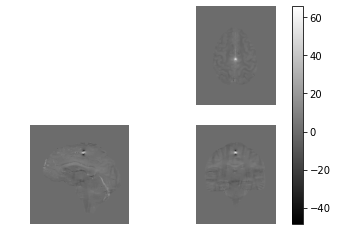

In [4]:
fig, axs = show_example(img_data, [82, 93, 146])
plt.show()